In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

In [3]:
sys.path.insert(1, '../src')
from plant import Plant
from sun import Sun
from state import State
from run import *
plt.rcParams['figure.figsize'] = [20, 10]

# Hypothetical Plant with Basic Layouts

In [4]:
plant = Plant(heli_layout_file_name="../data/layouts/uniform-random-layout.json")
print(plant)

Hypothetical Plant: 

	- field area:
		- [x_min, x_max] = [0.00, 100.00]
		- [y_min, y_max] = [0.00, 20.00]
		- diameter = 101.98
		- max_ij = 95.20

	- receiver: 
		- _height = 50.00
		- _angle = 80.00
		- _size = 5.00

	- heliostats:
		- number of heliostats n = 20.00
		- heli_size = 3.00
		- heli_rays = 5.00
		- heli_layout = uniform-random-layout 



In [5]:
plant.check_layout()

True

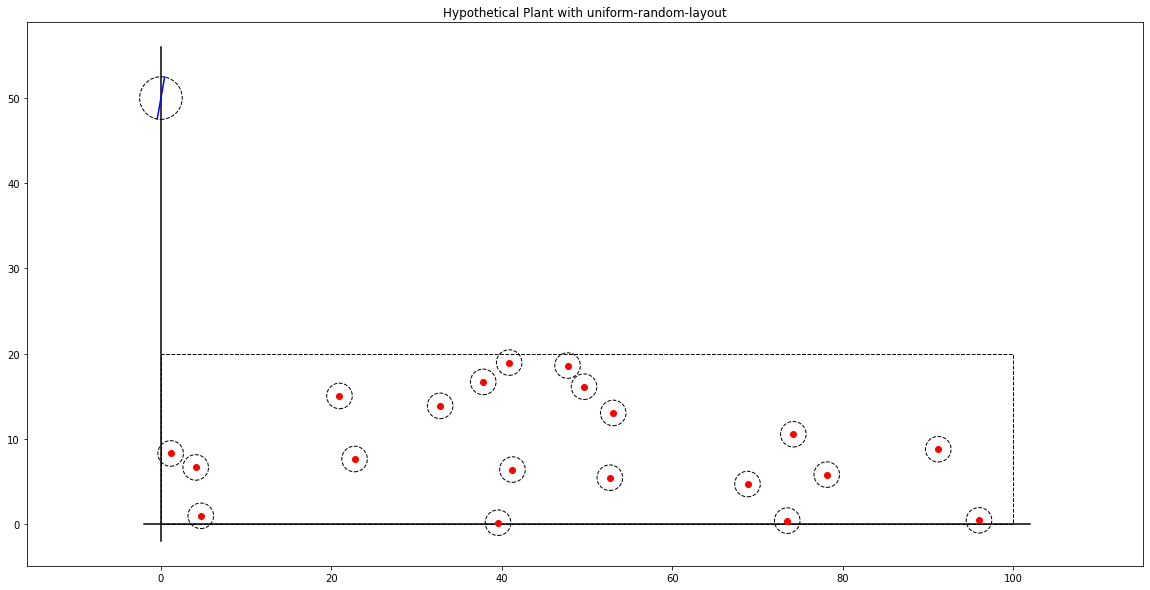

In [6]:
plant.draw()

Effects on heliostat 10: 

	* eta_aa = 0.980733
	* eta_cos = 0.330130
	* eta_sbm = 0.800000
	* received_rays / all_rays = 4 / 5
	* [not-shaded, not-blocked, not-missed] / all_rays = [5 4 5] / 5



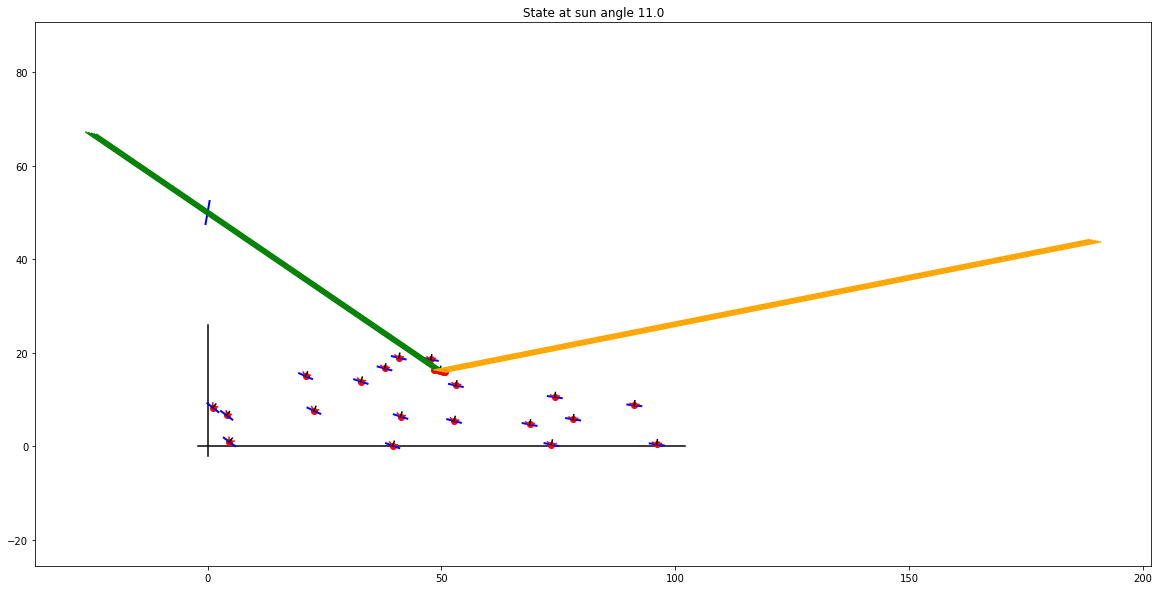

In [7]:
sun = Sun()
state = State(plant, sun_angle=sun.angles[1])
effects = state.get_effects(i=10, verbose=True)
state.draw(i=10)

In [8]:
energy, stats_df, powers = get_energy(plant, show_stats=True)

Hypothetical Plant with uniform-random-layout

	- energy = 118.18264889019580721197

	         mu_aa   mu_cos  mu_sbm
	- etas:  0.9807, 0.7586, 0.4865

	         pi_sha  pi_blo  pi_mis
	- sbms:  0.2812, 0.3165, 0.0741



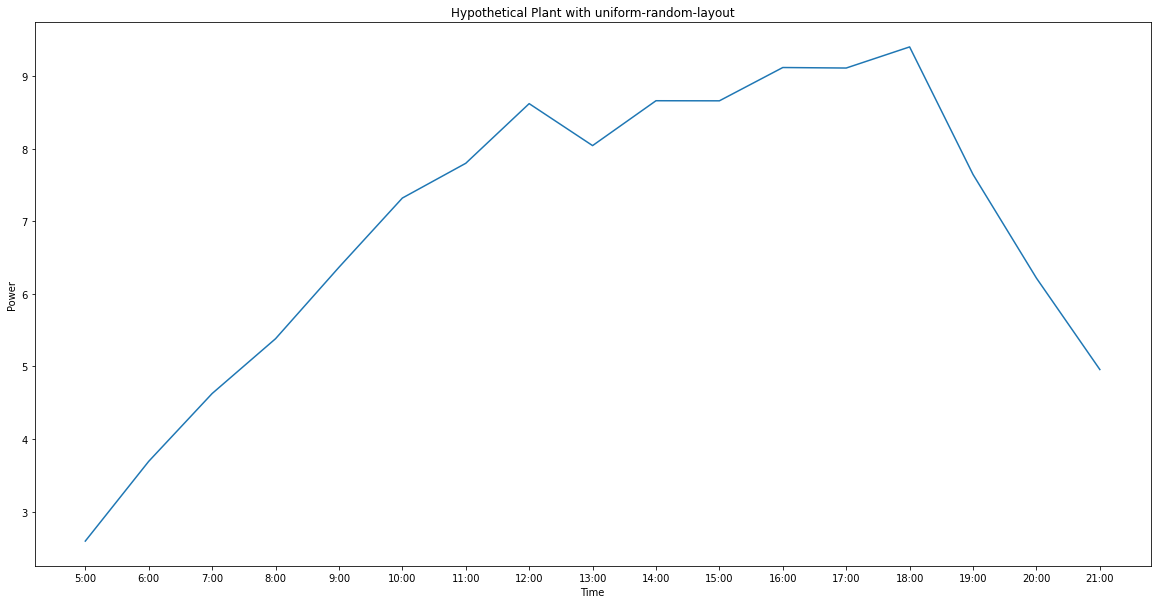

In [9]:
draw(plant, powers)

In [10]:
stats_df

,time,power,mu_aa,mu_cos,mu_sbm,pi_sha,pi_blo,pi_mis
0,5:00,2.592473,0.980733,0.236018,0.56,0.31,0.17,0.06
1,6:00,3.690968,0.980733,0.330130,0.57,0.25,0.21,0.06
2,7:00,4.625033,0.980733,0.421062,0.56,0.23,0.25,0.06
3,8:00,5.380049,0.980733,0.507939,0.54,0.14,0.27,0.08
4,9:00,6.364143,0.980733,0.589924,0.55,0.21,0.30,0.08
5,10:00,7.317996,0.980733,0.666229,0.56,0.14,0.31,0.08
6,11:00,7.796886,0.980733,0.736117,0.54,0.08,0.32,0.08
7,12:00,8.618750,0.980733,0.798915,0.55,0.11,0.35,0.08
8,13:00,8.040632,0.980733,0.854020,0.48,0.24,0.35,0.08
9,14:00,8.658719,0.980733,0.900900,0.49,0.24,0.35,0.08
